<a href="https://colab.research.google.com/github/cryptobills/Date-time-analysis-/blob/main/Data_cleaning_linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving Killa.xlsx to Killa.xlsx


{'Killa.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00?\x00a]I:O\x01\x00\x00\x8f\x04\x00\x00\x13\x00\x00\x00[Content_Types].xml\xad\x94\xcbn\xc20\x10E\xf7\xfd\x8a\xc8\xdb*1tQU\x15\x81E\x1f\xcb\x16\xa9\xf4\x03\\{B,\x1c\xdb\xf2\x0c\x14\xfe\xbe\x93\xf0P[Q\xa0\x82M\xacd\xee\xdcs\xc7\x8e<\x18-\x1b\x97- \xa1\r\xbe\x14\xfd\xa2\'2\xf0:\x18\xeb\xa7\xa5x\x9f<\xe7w"CR\xde(\x17<\x94b\x05(F\xc3\xab\xc1d\x15\x013n\xf6X\x8a\x9a(\xdeK\x89\xba\x86Fa\x11"x\xaeT!5\x8a\xf85MeTz\xa6\xa6 oz\xbd[\xa9\x83\'\xf0\x94S\xeb!\x86\x83G\xa8\xd4\xdcQ\xf6\xb4\xe4\xcf\xeb \t\x1c\x8a\xeca-lY\xa5P1:\xab\x15q].\xbc\xf9E\xc97\x84\x82;;\r\xd66\xe25\x0b\x84\xdcKh+\x7f\x036}\xaf\xbc3\xc9\x1a\xc8\xc6*\xd1\x8bjX%M\xd0\xe3\x14"J\xd6\x17\x87]\xf6\xc4\x0cUe5\xb0\xc7\xbc\xe1\x96\x02\xda@\x06L\x1e\xd9\x12\x12Y\xd8e>\xc8\xd6!\xc1\xff\xe1\xdb=j\xbbO$.\x9dDZ9\xc0\xb3G\xc5\x98@\x19\xac\x01\xa8q\xc5\xda\xf4\x08\x99\xf8\x7f\x82\xf5\xb3\x7f6\xbf\xb39\x02\xfc\x0ci\xf6\x11\xc2\xec\xd2\xc3\xb6k\xd1(\xebO\xe0wb\x94\xddr\xfe\xd4?\x83\xec\x

In [136]:
df=pd.read_excel('Killa.xlsx')

In [137]:
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [138]:
print(df.shape)
print(df.isna().sum())

(127, 3)
First Name     0
Last Name      0
transaction    0
dtype: int64


In [139]:
df.transaction=df.transaction.map(eval)

In [140]:

type(df.transaction)

pandas.core.series.Series

In [141]:
tx_df=pd.json_normalize(df.transaction)

In [142]:
type(tx_df)

pandas.core.frame.DataFrame

In [143]:
tx_df.sample()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
16,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [144]:
df.drop('transaction',1,inplace=True)

In [145]:
df.columns

Index(['First Name', 'Last Name'], dtype='object')

In [146]:
df2=pd.concat([df,tx_df],1)

In [147]:
df2.sample()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
60,uwoltboai,o afsloeumidoluyalna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


Now Treating the datetime column

In [148]:
print(type(df2.tx_date))
print(type(df2.dob))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [149]:
df2.dtypes

First Name    object
Last Name     object
tx_id         object
tx_date       object
tx_amount      int64
tx_mode       object
tx_channel    object
bank_name     object
dob           object
dtype: object

converting date objects to datetime

In [150]:
df2.dob

0      [1992-11-10 00:00:00]
1                      [n/a]
2      [1992-01-01 00:00:00]
3      [1981-01-07 00:00:00]
4                      [n/a]
               ...          
122                    [n/a]
123                    [n/a]
124                    [n/a]
125                    [n/a]
126                    [n/a]
Name: dob, Length: 127, dtype: object

In [151]:
df2['dob']=df2['dob'].str.get(0)

In [152]:
df2.replace('n/a',np.NaN,inplace=True)

In [153]:
df2.head(2)

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN


In [154]:
df2.fillna(0,inplace=True)

In [157]:
df2['tx_date']=pd.to_datetime(df2['tx_date'])
df2['dob']=pd.to_datetime(df2['dob'])


In [158]:
df2.dtypes

First Name            object
Last Name             object
tx_id                 object
tx_date       datetime64[ns]
tx_amount              int64
tx_mode               object
tx_channel            object
bank_name             object
dob           datetime64[ns]
dtype: object

In [159]:
df2.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13,6192,Debit,web,QBank,1992-11-10
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12,38445,Debit,mobile,ABank,1970-01-01
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13,29627,Debit,mobile,GBank,1992-01-01
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13,27791,Debit,web,KBank,1981-01-07
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13,6192,Debit,web,QBank,1970-01-01


In [160]:
df2['year']=pd.DatetimeIndex(df2['dob']).year

In [161]:
df2.sample()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year
96,weblaaab,haizboc,5ed3d67b8723c11444c43283,2020-06-13,6192,Debit,web,QBank,1970-01-01,1970


In [163]:
year=datetime.now().year
df2['age']=year-df2.year
df2.drop('dob',1,inplace=True)
df2.sample()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,year,age
77,uasdyn,dknehei,5ed3d67b8723c11444c43283,2020-06-12,38445,Debit,mobile,ABank,1970,50


In [164]:
df2.drop('year',1,inplace=True)

In [166]:
q1=pd.DataFrame(df2['age'].value_counts().head(5)).reset_index()
q1.columns=['age','counts']
q1

,age,counts
0,50,82
1,28,6
2,40,5
3,44,4
4,31,4


In [167]:
lol=df2['tx_channel'].value_counts()
lol

mobile    64
web       63
Name: tx_channel, dtype: int64

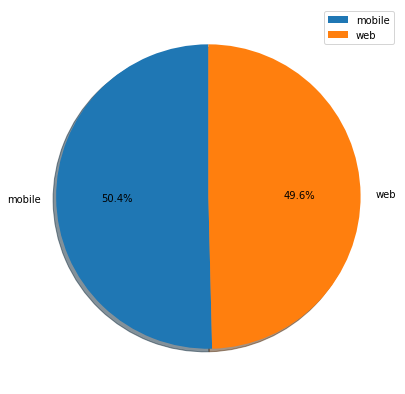

In [168]:
fig=plt.figure(figsize=(10,7))
plt.pie(lol,labels=['mobile','web'],autopct='%1.1f%%', shadow=True,startangle=90)
plt.legend()
plt.show()

In [176]:
df2.to_excel('power.xlsx')


In [177]:
files.download('power.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>